<a href="https://colab.research.google.com/github/angeless24/Summary/blob/main/TPF_Sarciat_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Cómo podemos disminuir las pérdidas causadas por precipitaciones no planificadas en el sector agrícola?

## Introducción

**Abstract**
La motivación detrás de este análisis es comprender las relaciones y patrones existentes en los datos climáticos, lo que puede ser útil para la toma de decisiones en diversas áreas, como agricultura y ganadería. El resultado de este proyecto está dirigido a productores/agricultores que hoy en dia no cuentan con informacion clara con respecto a precipitaciones para planificar sus actividades.

**Objetivo**
Desarrollar un modelo de predicción para determinar si lloverá o no mañana en función de variables meteorológicas históricas. El modelo utilizará datos pasados para predecir la presencia o ausencia de lluvia el día siguiente.

**Contexto comercial**
En el sector agrícola la disponibilidad de información precisa sobre las condiciones climáticas es fundamental para la toma de decisiones estratégicas. La planificación y ejecución eficientes de actividades agropecuarias están estrechamente ligadas a la capacidad de predecir si lloverá o no en el corto plazo. Los productores y agricultores enfrentan desafíos considerables al tomar decisiones sobre riego, cultivo y cosecha, ya que la precipitación puede tener un impacto significativo en los costos de producción y la eficiencia de los recursos. Al tener información clara y confiable sobre las probabilidades de lluvia, los agricultores pueden ajustar sus prácticas de manera más precisa, optimizar la producción y reducir el desperdicio de recursos, lo que a su vez contribuye al desarrollo sostenible del sector agrícola.

**Problema Comercial**
Actualmente, al no contar con información precisa de si lloverá o no al día siguiente, los productores planifican acrividades que insumen tiempo y costos y que se ven afectadas por la lluvia. Dos ejeplos son:
- Riego artificial: al detectar poca humedad en la tierra se decide prender el riego artificial sobre un sembrado, pero al día siguiente llueve, sobre saturando de humedad la tierra y haciendo innecesario el riego del dia anterior.
- Cosecha: para realizar la cosecha de un cultivo, es necesario que este este seco y la humedad del grano se encuentre en un determinado rango. Muchas veces sucede que se define comenzar la cosecha al día siguiente, esperando que el % de humedad baje un poco mas pero llueve, causando un gran esfuerzo y también gasto económico. la lluvia durante la cosecha implica tener equipos inmovilizados, la necesidad de esperar nuevamente un período de tiempo a que el grano vuelva a secar (y esto a su vez hace que parte del grano se pierda), entre otras cosas. Poder predecir si lloverá al día siguiente permite evitar el movimiento innecesario de equipos o incluso aumentar las horas de cosecha del día anterior si se quiere adelantar el proceso antes de la lluvia.

**Contexto analítico**
En este análisis, se usarán técnicas de aprendizaje automático (machine learning) para construir un modelo predictivo basado en datos meteorológicos históricos de las distintas regiones. se tendrán en cuenta variables como la temperatura, humedad, velocidad y dirección del viento, precipitación previa, entre otras, para entrenar y evaluar el modelo. Se utilizarán algoritmos de clasificación para predecir si lloverá o no en función de estas variables.

##Carga y Exploración de Datos
Primero, cargamos los datos climáticos históricos y exploramos su estructura:

In [ ]:
#llamo a las librerías a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
! pip install chart_studio
! pip install bqplot
! pip install pingouin
from   scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
 #levanto el archivo
df = pd.read_csv('/content/weatherAUS.csv',sep=',')

In [ ]:
#reviso las primeras filas
pd.set_option('display.max_columns', 30)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#reviso el tamaño
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Graficamos la cantidad de registros por año

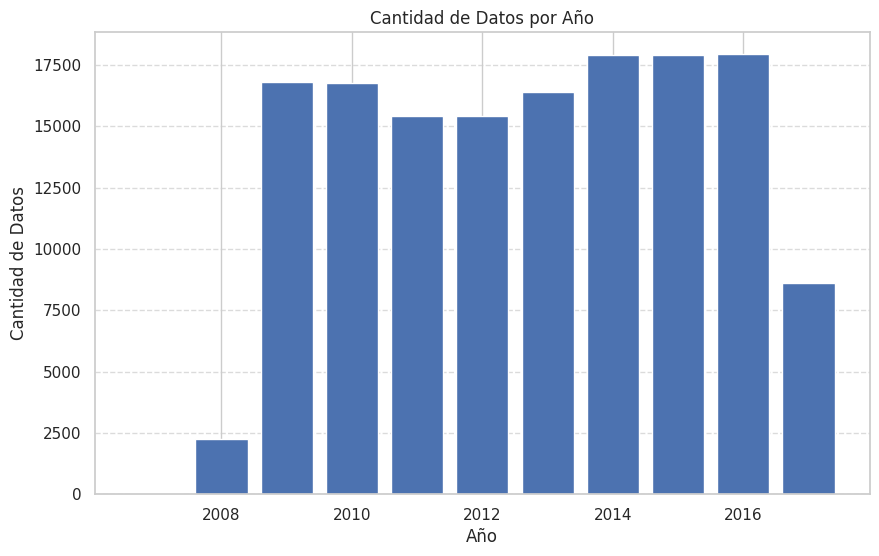

In [ ]:
# Convierto la columna 'Date' al tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraigo el año de cada fecha y creo una nueva columna 'Year'
df['Year'] = df['Date'].dt.year

# Cuento la cantidad de registros por año
data_by_year = df['Year'].value_counts().sort_index()

# Creo el gráfico
plt.figure(figsize=(10, 6))
plt.bar(data_by_year.index, data_by_year.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Datos')
plt.title('Cantidad de Datos por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Análisis de Datos Climáticos
Utilizamos diversas técnicas y visualizaciones para examinar y descubrir los aspectos más importantes de los datos. Comenzamos por calcular estadísticas descriptivas para comprender la distribución y variabilidad de los valores:

In [ ]:
summary_stats = df.describe()
print(summary_stats)

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [ ]:
num_cities = df['Location'].nunique()
print(f'Número de Ciudades: {num_cities}')

Número de Ciudades: 49


Al ejecutar este código, obtenemos un resumen de las principales medidas estadísticas de nuestro conjunto de datos, lo que nos proporciona una instantánea rápida de cómo se distribuyen los valores en cada columna.

##Explorando las Variables Clave
Ahora, pasamos a visualizar algunas de las variables clave en nuestros datos climáticos. Comenzamos trazando histogramas de las temperaturas máximas y las diferencias entre las temperaturas máximas y mínimas.
Estas visualizaciones nos permiten explorar cómo se distribuyen las temperaturas máximas, cómo se relacionan las diferencias de temperatura con la lluvia y si existe alguna correlación entre la velocidad del viento en ráfagas y la lluvia.

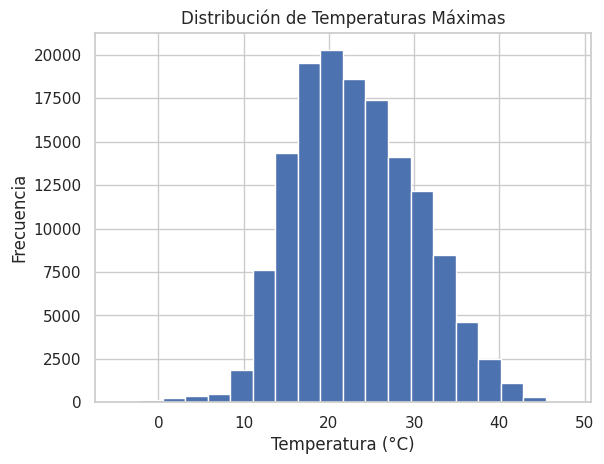

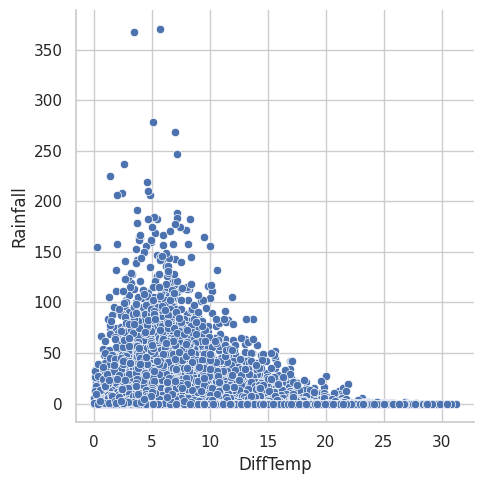

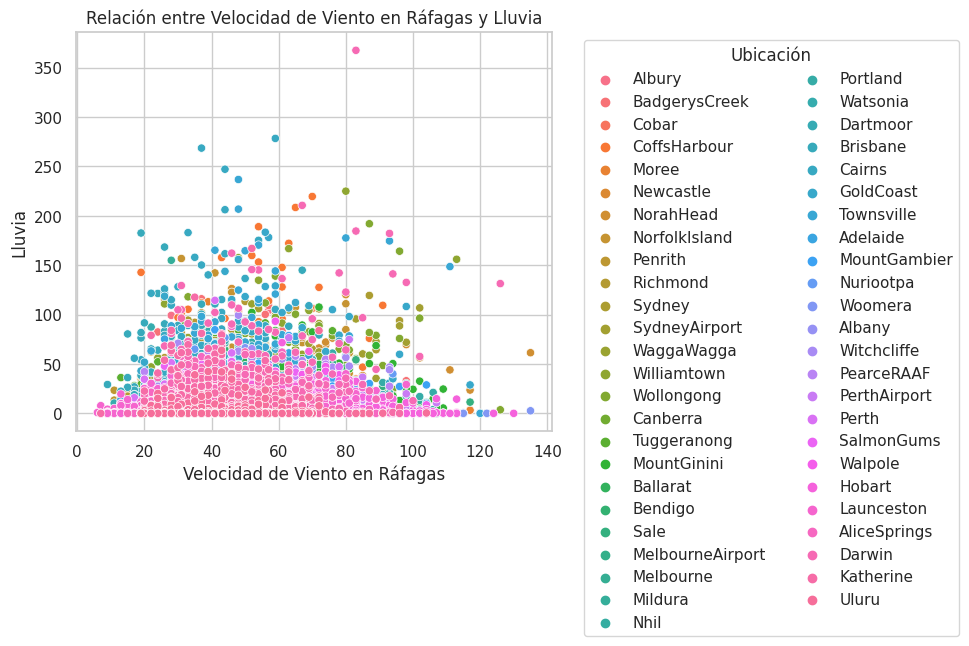

In [ ]:
# Histograma de Temperaturas Máximas
df['MaxTemp'].plot(kind='hist', bins=20)
plt.title('Distribución de Temperaturas Máximas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la Diferencia de Temperaturas y la Lluvia
df['DiffTemp'] = df['MaxTemp'] - df['MinTemp']
sns.relplot(data=df, x="DiffTemp", y="Rainfall")

# Relación entre la Velocidad de Viento en Ráfagas y la Lluvia
# Configuración para dividir la leyenda en dos columnas
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
sns.scatterplot(data=df, x="WindGustSpeed", y="Rainfall", hue="Location")
plt.legend(title="Ubicación", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xlabel("Velocidad de Viento en Ráfagas")
plt.ylabel("Lluvia")
plt.title("Relación entre Velocidad de Viento en Ráfagas y Lluvia")
plt.tight_layout()
plt.show()


Ahora, nos centramos en la lluvia y exploramos su distribución en días con precipitaciones. Al observar este histograma, podemos comprender mejor cómo se distribuyen las cantidades de lluvia en diferentes rangos y cuántos días se encuentran en cada categoría:

<Axes: xlabel='Rainfall', ylabel='Count'>

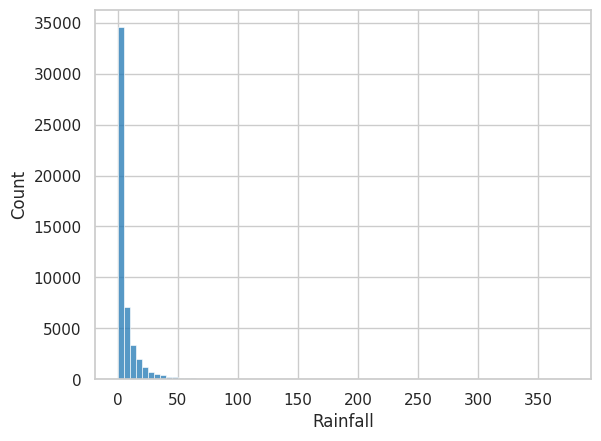

In [ ]:
# Filtrar días con lluvia
dias_con_lluvia = df.query("Rainfall > 0")

# Definir el tamaño de los buckets y crear histograma
bucket_size = 5
bins = np.arange(0, dias_con_lluvia['Rainfall'].max() + bucket_size, bucket_size)
sns.histplot(data=dias_con_lluvia, x='Rainfall', bins=bins)

##Análisis Temporal
Finalmente, exploramos cómo ha variado la lluvia a lo largo de los años y en diferentes ubicaciones.

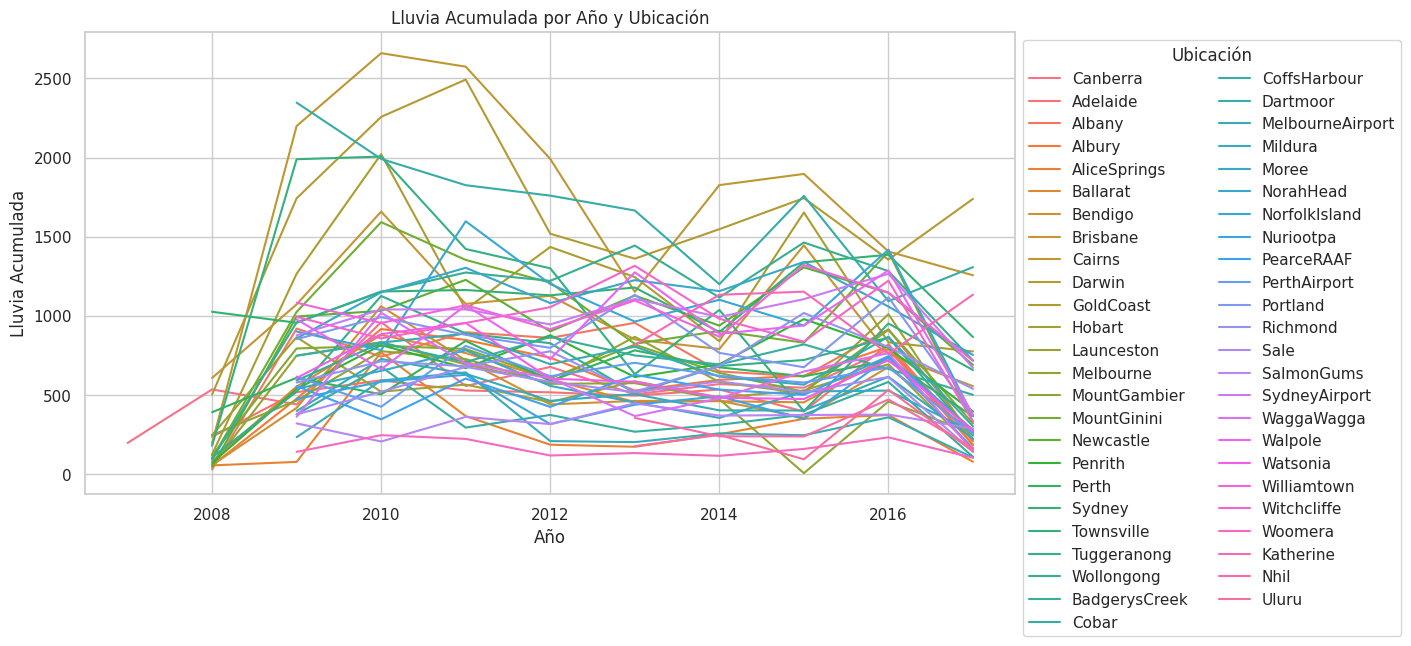

In [ ]:

# Convertir la columna 'Date' a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año y el mes de la columna 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Agrupar por año y ubicación para calcular la lluvia acumulada
df_year_location = df.groupby(['Year', 'Location'])['Rainfall'].sum().reset_index()

# Visualizar la lluvia acumulada por año y ubicación con leyenda en varias columnas
sns.set(style="whitegrid")  # Estilo del gráfico
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Crear el gráfico de líneas con leyenda en varias columnas
plot = sns.lineplot(data=df_year_location, x='Year', y='Rainfall', hue='Location')

# Personalizar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Lluvia Acumulada')
plt.title('Lluvia Acumulada por Año y Ubicación')

# Mostrar la leyenda en varias columnas para mejorar la legibilidad
plot.legend(title='Ubicación', bbox_to_anchor=(1, 1), ncol=2)

plt.show()

Esta visualización nos permite identificar cómo ha variado la lluvia acumulada en diferentes ubicaciones a lo largo de los años, brindándonos una perspectiva temporal y geográfica de los patrones climáticos.

En este capítulo, hemos explorado una variedad de aspectos de los datos climáticos, desde las estadísticas descriptivas hasta las relaciones entre variables y las tendencias temporales. Este análisis nos ha permitido adentrarnos en el mundo fascinante y complejo de la meteorología y comprender mejor los patrones climáticos en las ciudades de Australia.

## Borrado de duplicados

En nuestro proceso de análisis de datos climáticos, es esencial asegurarnos de que nuestros datos estén limpios y libres de duplicados que puedan afectar la calidad de nuestro análisis. Vamos a examinar si hay filas duplicadas en nuestro DataFrame y, en caso afirmativo, analizaremos las entradas repetidas para identificar cualquier patrón o problema potencial.

In [ ]:
# Verifico si hay filas duplicadas en el dataframe
duplicates_exist = df.duplicated()
#Extraigo las filas que están duplicadas
duplicates = df[duplicates_exist]
#Cantidad de filas duplicadas
num_duplicates = duplicates.shape[0]
if num_duplicates > 0:
    print(f"Se encontraron {num_duplicates} filas duplicadas en el dataframe.")
    print("Estas son las filas duplicadas:")
    print(duplicates)
else:
    print("No se encontraron filas duplicadas en el dataframe.")

No se encontraron filas duplicadas en el dataframe.


## Analisis de nulos
En el proceso de análisis de datos climáticos, es fundamental comprender la presencia de valores faltantes en nuestras variables, ya que pueden afectar la integridad y la interpretación de nuestros resultados. Vamos a investigar las variables con valores faltantes y explorar diferentes enfoques para manejarlos.

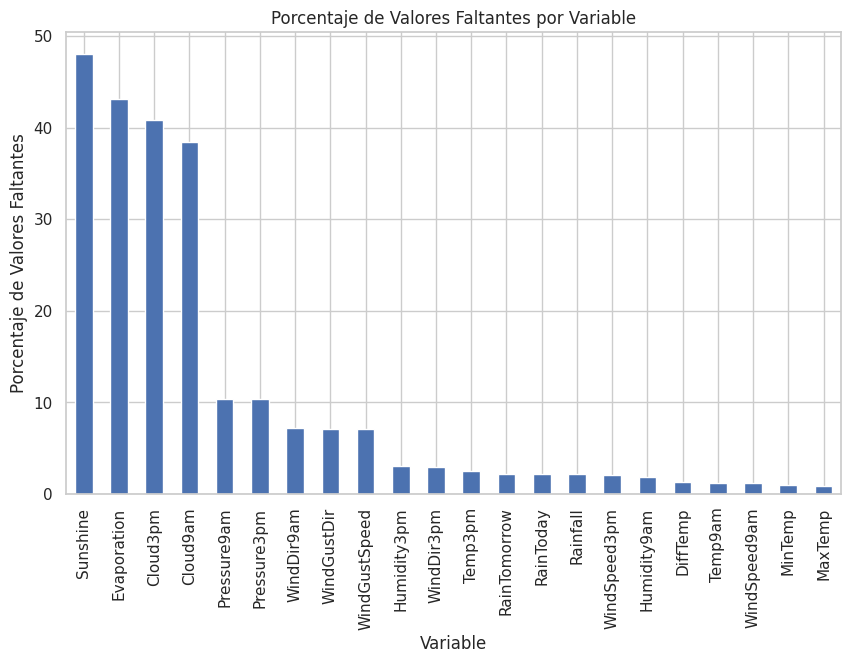

In [ ]:
# Configuramos la opción para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Calculamos el porcentaje de valores faltantes por variable
serie = (df.isnull().sum() / df.shape[0]) * 100
serie = serie.sort_values(ascending=False)
serie = serie[serie > 0]

# Visualizamos el porcentaje de valores faltantes en forma gráfica
plt.figure(figsize=(10, 6))
serie.plot(kind='bar')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variable')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.show()

Además, utilizaremos la biblioteca missingno para visualizar patrones de valores faltantes en nuestro DataFrame.

<Axes: >

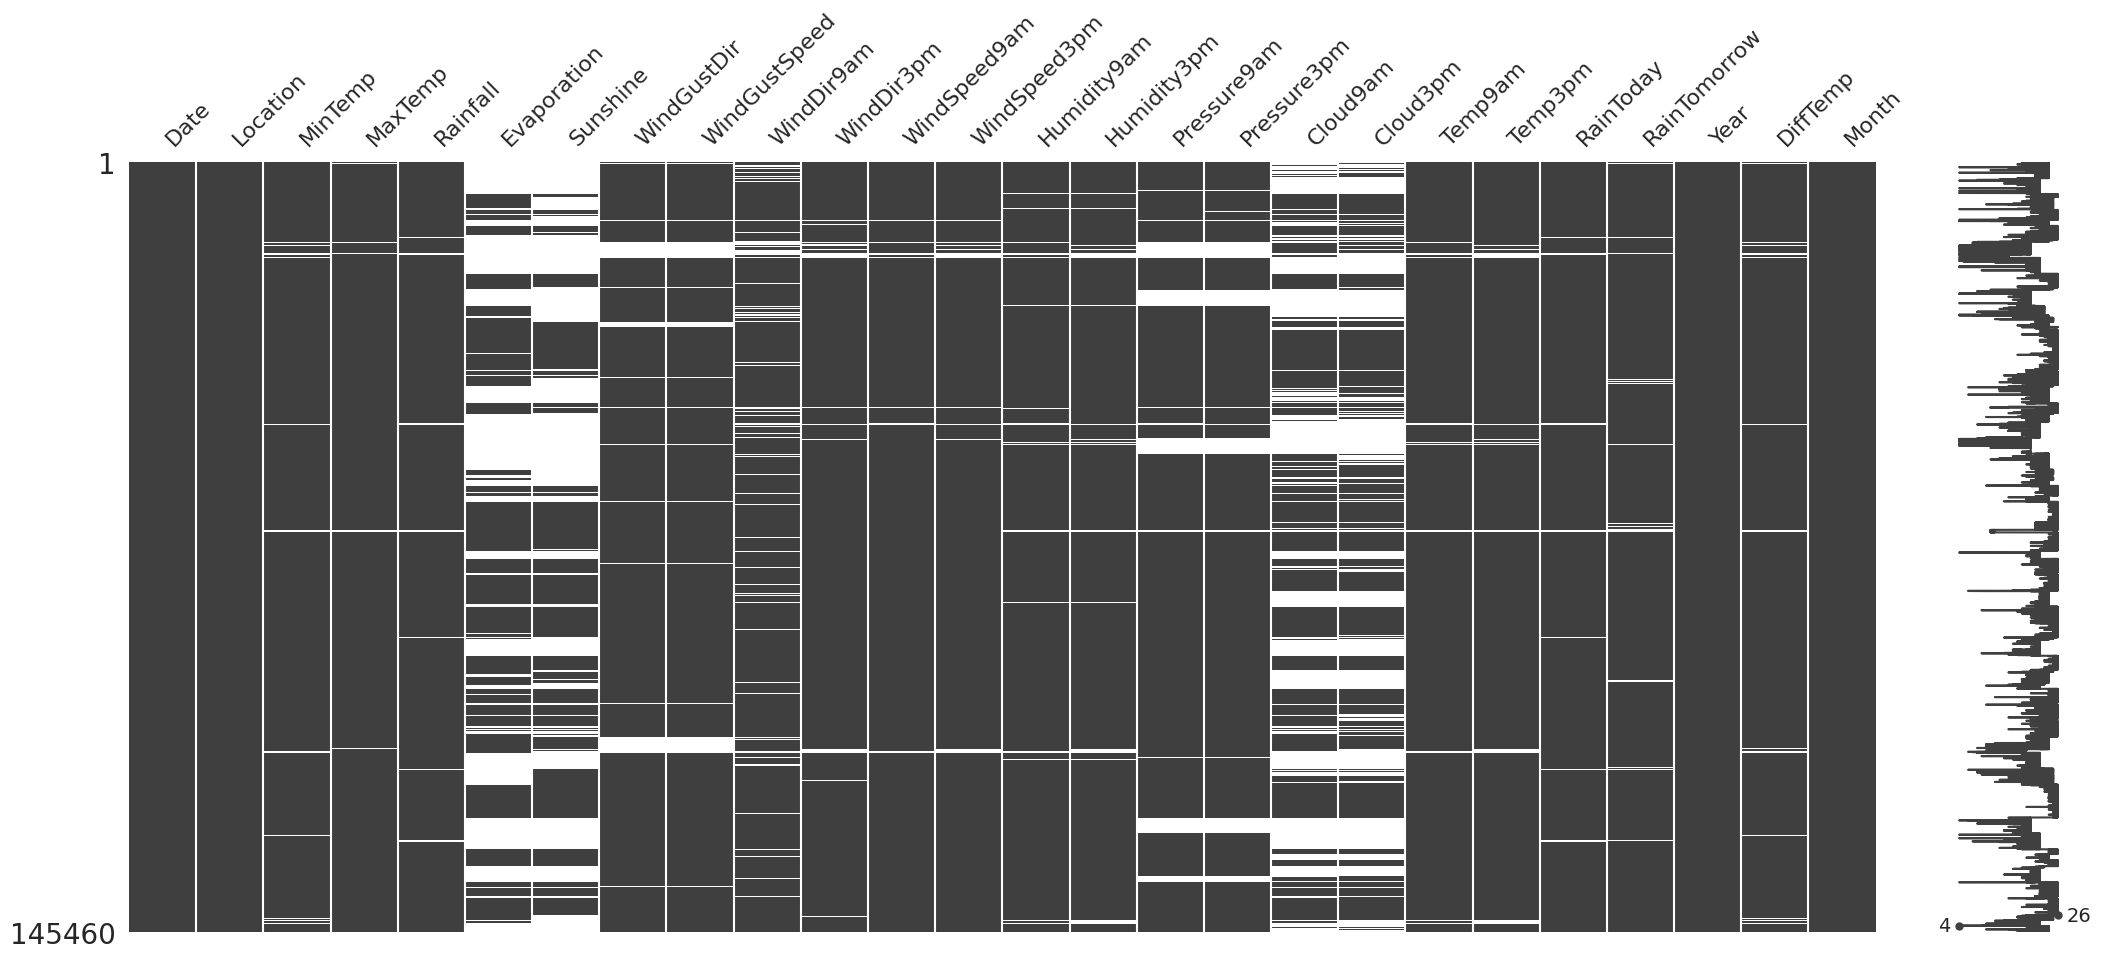

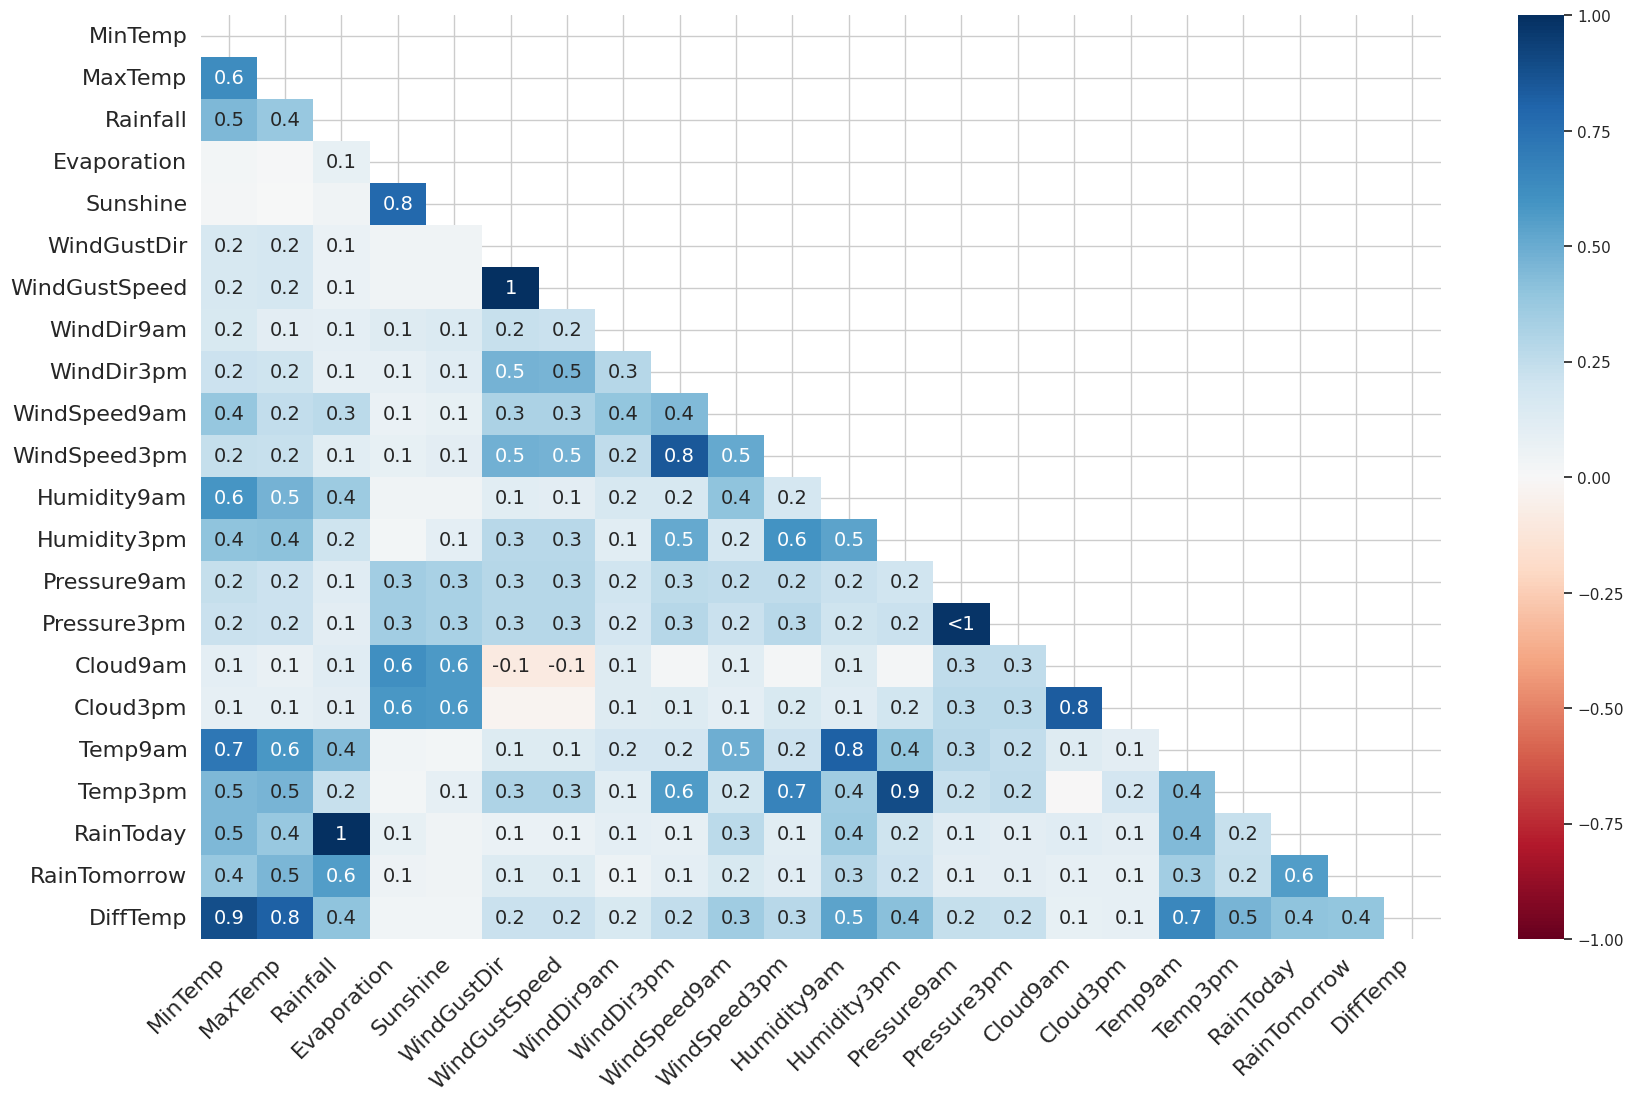

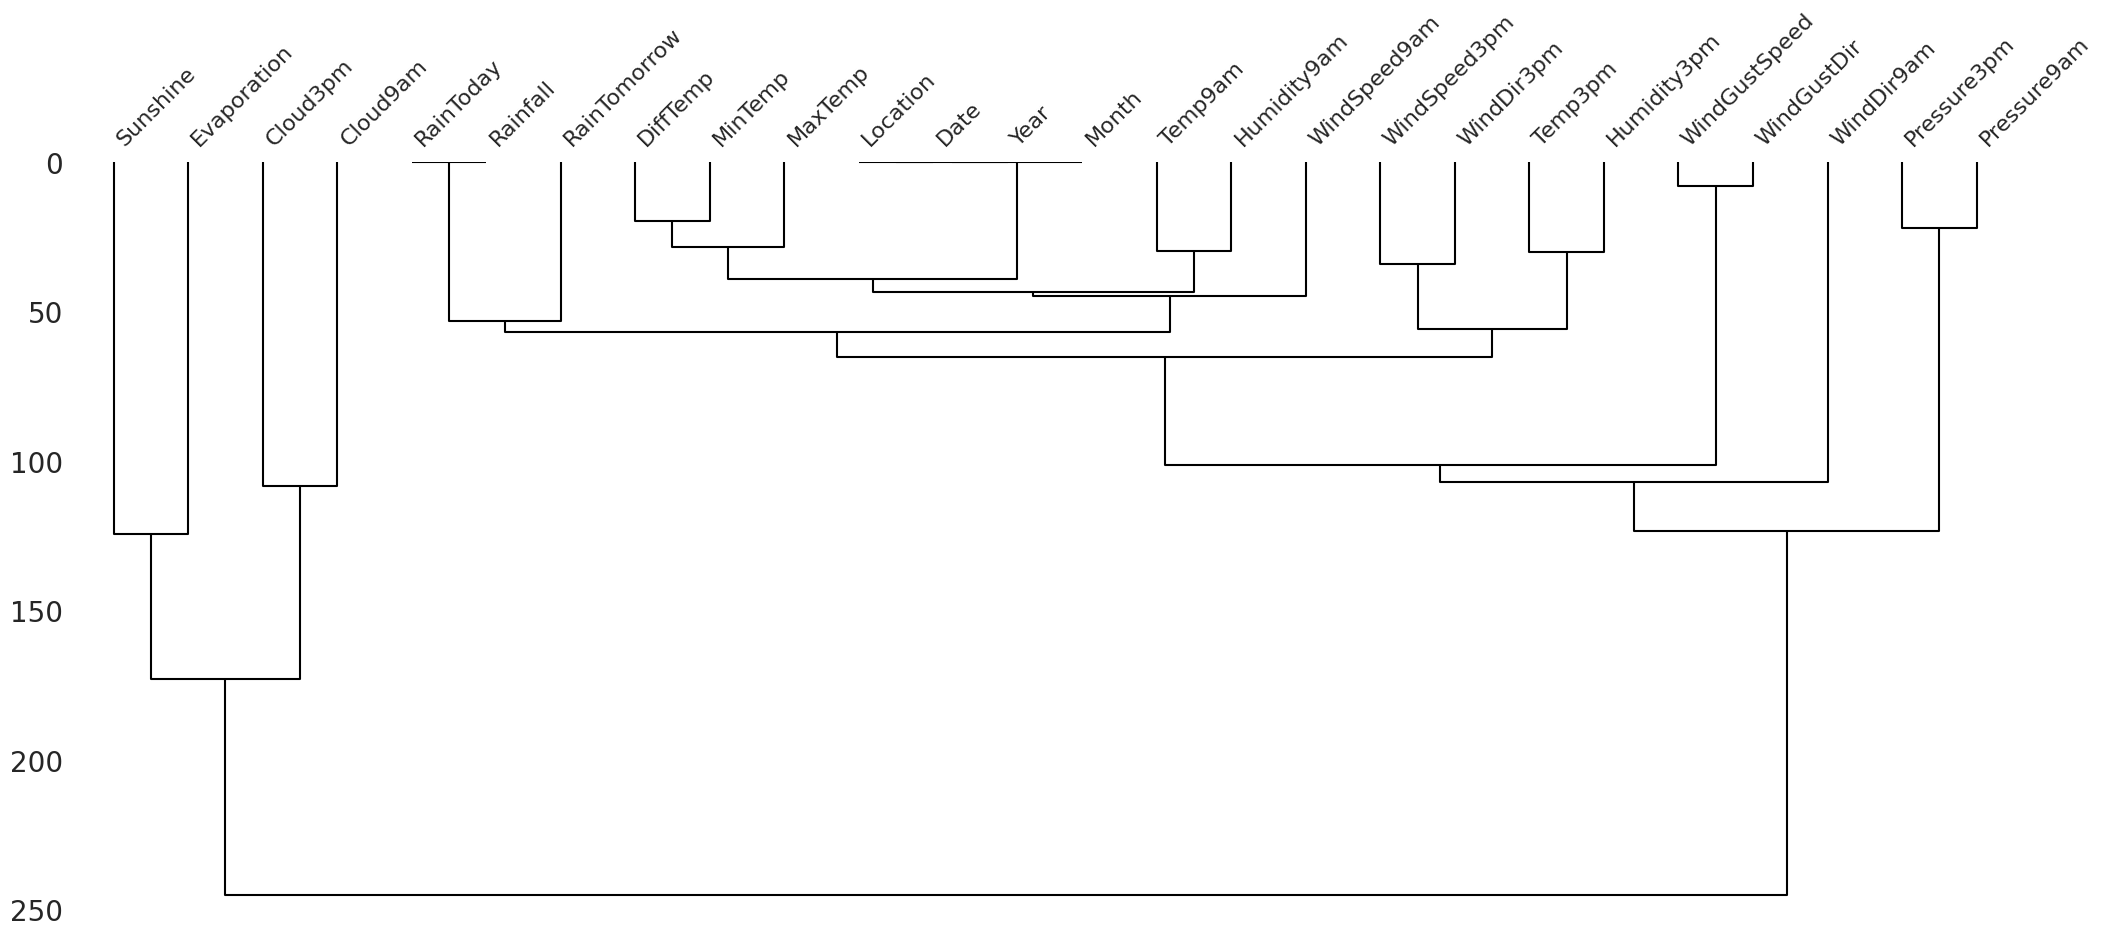

In [ ]:


# Visualización de patrones de valores faltantes
msno.matrix(df)  # Matriz de valores faltantes
msno.heatmap(df)  # Mapa de calor de correlación de valores faltantes
msno.dendrogram(df)  # Dendrograma de valores faltantes

A continuación, exploraremos algunas de las variables con la mayor cantidad de valores faltantes y consideraremos cómo manejarlos.

In [ ]:
# Exploración de la variable Sunshine
# Conteo de valores únicos en la variable 'Sunshine'
sunshine_counts = df['Sunshine'].value_counts()
print("Conteo de valores únicos en 'Sunshine':")
print(sunshine_counts)

# Exploración de la variable Evaporation
# Conteo de valores redondeados en la variable 'Evaporation'
conteo_redondeado_evaporation = df['Evaporation'].round().value_counts()
print("Conteo de valores redondeados en 'Evaporation':")
print(conteo_redondeado_evaporation)

# Exploración de la variable Cloud9am
# Conteo de valores redondeados en la variable 'Cloud9am'
conteo_redondeado_cloud9am = df['Cloud9am'].round().value_counts()
print("Conteo de valores redondeados en 'Cloud9am':")
print(conteo_redondeado_cloud9am)

Conteo de valores únicos en 'Sunshine':
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
10.9    1021
10.3    1010
10.2     993
10.0     984
11.1     978
10.6     971
10.4     969
9.8      967
10.1     949
9.2      925
11.2     909
9.9      897
9.5      866
9.6      859
9.7      852
9.4      839
9.3      829
9.0      776
9.1      771
8.8      762
11.3     762
8.4      717
11.4     715
8.9      708
8.7      701
8.2      689
8.5      661
8.0      660
11.6     659
8.3      650
7.8      643
7.2      630
13.0     625
8.6      622
8.1      616
12.0     609
11.7     593
11.5     587
12.7     573
7.3      572
13.1     570
7.1      570
13.2     568
7.7      564
11.9     561
7.5      559
11.8     558
7.6      552
0.1      542
12.2     542
6.3      535
6.8      532
6.1      531
12.5     531
6.9      527
7.9      525
7.0      522
6.0      521
0.2      521
7.4      518
6.2      508
6.6      501
6.5      500
12.6     499
12.3     490
12.4     481
5.7      481
6.4      478
5.5      47

In [ ]:
# Relleno de valores faltantes con la mediana

# Agrupamos por mes y ciudad y calcular la mediana
median_values = df.groupby(['Month', 'Location']).median()

# Rellenamos valores faltantes con la mediana correspondiente
col_inter = ['Evaporation','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','DiffTemp']

for col in col_inter:
    print(f"Valores faltantes en '{col}':", df[col].isnull().sum())

    df[col] = df.apply(lambda row: median_values.loc[row['Month'], row['Location']][col] if pd.isnull(row[col]) else row[col], axis=1)

    print(f"Valores faltantes en '{col}':", df[col].isnull().sum())

# Agrupamos por mes para calcular la mediana para reemplazar en los casos que no se pudo por mes-ciudad
median_values = df.groupby(['Month']).median()

# Rellenamos valores faltantes con la mediana correspondiente
col_inter = ['Evaporation','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','DiffTemp']

for col in col_inter:
    print(f"Valores faltantes en '{col}':", df[col].isnull().sum())

    df[col] = df.apply(lambda row: median_values.loc[row['Month']][col] if pd.isnull(row[col]) else row[col], axis=1)

    print(f"Valores faltantes en '{col}':", df[col].isnull().sum())


<ipython-input-93-a7f819d4bbb7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = df.groupby(['Month', 'Location']).median()


Valores faltantes en 'Evaporation': 62790
Valores faltantes en 'Evaporation': 46735
Valores faltantes en 'MinTemp': 1485
Valores faltantes en 'MinTemp': 0
Valores faltantes en 'MaxTemp': 1261
Valores faltantes en 'MaxTemp': 0
Valores faltantes en 'Rainfall': 3261
Valores faltantes en 'Rainfall': 0
Valores faltantes en 'WindGustSpeed': 10263
Valores faltantes en 'WindGustSpeed': 6079
Valores faltantes en 'WindSpeed9am': 1767
Valores faltantes en 'WindSpeed9am': 0
Valores faltantes en 'WindSpeed3pm': 3062
Valores faltantes en 'WindSpeed3pm': 0
Valores faltantes en 'Humidity9am': 2654
Valores faltantes en 'Humidity9am': 0
Valores faltantes en 'Humidity3pm': 4507
Valores faltantes en 'Humidity3pm': 0
Valores faltantes en 'Pressure9am': 15065
Valores faltantes en 'Pressure9am': 12119
Valores faltantes en 'Pressure3pm': 15028
Valores faltantes en 'Pressure3pm': 12119
Valores faltantes en 'Temp9am': 1767
Valores faltantes en 'Temp9am': 0
Valores faltantes en 'Temp3pm': 3609
Valores faltantes 

<ipython-input-93-a7f819d4bbb7>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = df.groupby(['Month']).median()


Valores faltantes en 'Evaporation': 0
Valores faltantes en 'MinTemp': 0
Valores faltantes en 'MinTemp': 0
Valores faltantes en 'MaxTemp': 0
Valores faltantes en 'MaxTemp': 0
Valores faltantes en 'Rainfall': 0
Valores faltantes en 'Rainfall': 0
Valores faltantes en 'WindGustSpeed': 6079
Valores faltantes en 'WindGustSpeed': 0
Valores faltantes en 'WindSpeed9am': 0
Valores faltantes en 'WindSpeed9am': 0
Valores faltantes en 'WindSpeed3pm': 0
Valores faltantes en 'WindSpeed3pm': 0
Valores faltantes en 'Humidity9am': 0
Valores faltantes en 'Humidity9am': 0
Valores faltantes en 'Humidity3pm': 0
Valores faltantes en 'Humidity3pm': 0
Valores faltantes en 'Pressure9am': 12119
Valores faltantes en 'Pressure9am': 0
Valores faltantes en 'Pressure3pm': 12119
Valores faltantes en 'Pressure3pm': 0
Valores faltantes en 'Temp9am': 0
Valores faltantes en 'Temp9am': 0
Valores faltantes en 'Temp3pm': 0
Valores faltantes en 'Temp3pm': 0
Valores faltantes en 'DiffTemp': 0
Valores faltantes en 'DiffTemp': 0

In [ ]:
# Eliminación de columnas que no aportan información relevante o tienen demasiados nulos
col_del = ['Cloud9am','Date','Location','Sunshine','Cloud3pm']  # Columnas a borrar que no aportan
df = df.drop(labels=col_del, axis=1)
print("Columnas después de borrar:", df.columns)
df.info()

Columnas después de borrar: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'DiffTemp', 'Month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 

In [ ]:
# convertimos las variables categoricas en binarias
df=pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})
df=df.astype(float)
df = df.dropna(subset=['RainTomorrow'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 67 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Rainfall         142193 non-null  float64
 3   Evaporation      142193 non-null  float64
 4   WindGustSpeed    142193 non-null  float64
 5   WindSpeed9am     142193 non-null  float64
 6   WindSpeed3pm     142193 non-null  float64
 7   Humidity9am      142193 non-null  float64
 8   Humidity3pm      142193 non-null  float64
 9   Pressure9am      142193 non-null  float64
 10  Pressure3pm      142193 non-null  float64
 11  Temp9am          142193 non-null  float64
 12  Temp3pm          142193 non-null  float64
 13  RainTomorrow     142193 non-null  float64
 14  Year             142193 non-null  float64
 15  DiffTemp         142193 non-null  float64
 16  Month            142193 non-null  floa

##Predicción

División de Datos

In [ ]:

# Definimos las características (X) y la variable objetivo (y)
X = df.drop(columns='RainTomorrow', axis=1)
y = df["RainTomorrow"]
# Dividimos los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (113754, 66) (113754,)
Dimensiones del conjunto de prueba (X_test, y_test): (28439, 66) (28439,)


Modelo de regresión logistica

In [ ]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Cross-Validation Accuracy: 0.8422384988753061

AUC-ROC (Logistic Regression): 0.8531541886881464


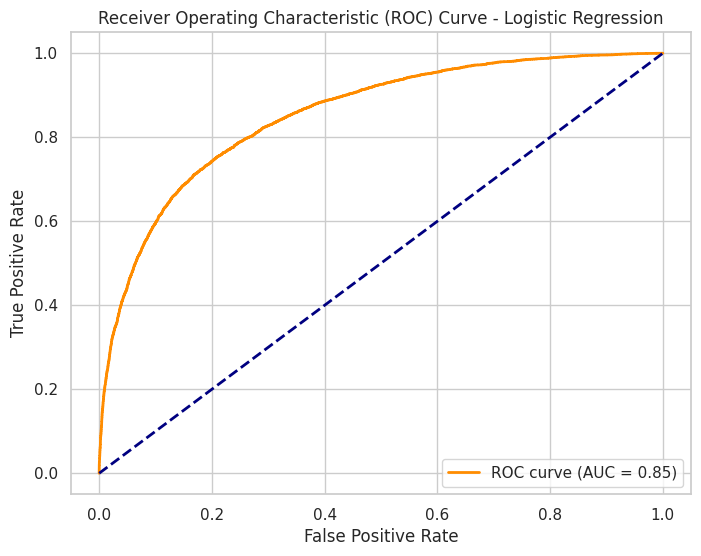


Test Set Metrics:
Accuracy: 0.8383909420162453
Confusion Matrix:
 [[20806  1292]
 [ 3304  3037]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.70      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



In [ ]:
# Creamos una instancia del modelo de regresión logística
logistic_model = LogisticRegression()

# Realizamos validación cruzada para evaluar el rendimiento del modelo
logistic_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Imprimimos el rendimiento promedio durante la validación cruzada
print("Cross-Validation Accuracy:", np.mean(logistic_scores))

# Entrenamos el modelo con los datos de entrenamiento
logistic_model.fit(X_train_scaled, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

# Evaluamos el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculamos y evaluamos el AUC-ROC
y_prob_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de la clase positiva
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)

# Imprimimos el AUC-ROC
print("\nAUC-ROC (Logistic Regression):", roc_auc_logistic)

# Calculamos la curva ROC
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Imprimimos las métricas del conjunto de prueba
print("\nTest Set Metrics:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

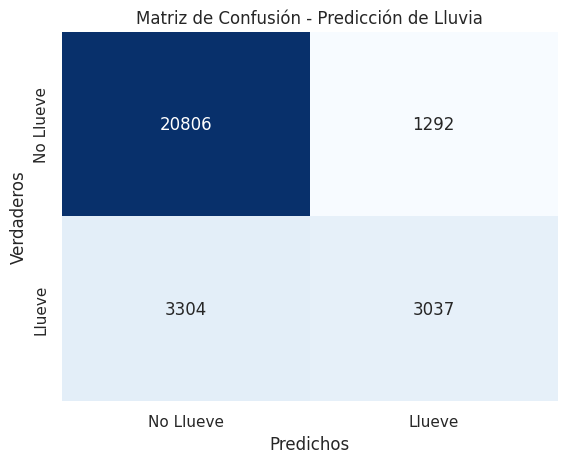

In [ ]:
# Creamos un heatmap con seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Llueve', 'Llueve'],
            yticklabels=['No Llueve', 'Llueve'])

plt.title('Matriz de Confusión - Predicción de Lluvia')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

2do modelo: Random Forest

Cross-Validation Accuracy (Random Forest): 0.851372237133883

Test Set Metrics (Random Forest):
Accuracy: 0.8503111923766659
Confusion Matrix:
 [[21083  1015]
 [ 3242  3099]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22098
         1.0       0.75      0.49      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439


AUC-ROC (Random Forest): 0.8726277252243446


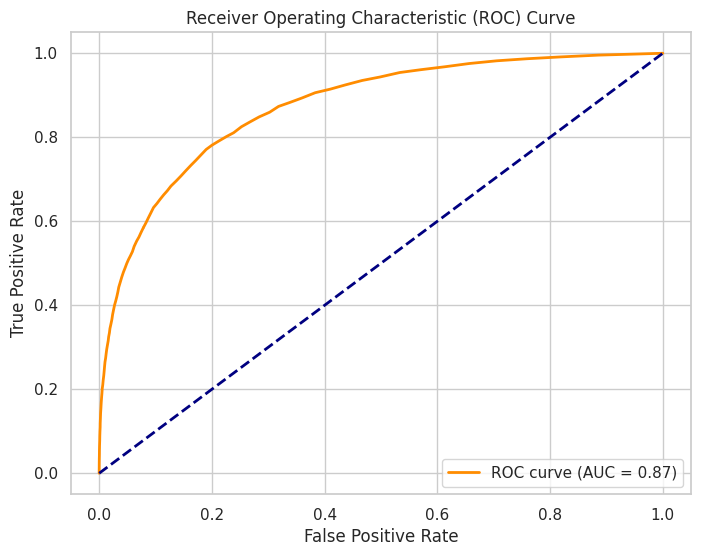

In [ ]:
# Creamos una instancia del modelo de Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Realizamos validación cruzada para evaluar el rendimiento del modelo
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimimos el rendimiento promedio durante la validación cruzada
print("Cross-Validation Accuracy (Random Forest):", np.mean(rf_scores))

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el modelo en el conjunto de prueba
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nTest Set Metrics (Random Forest):")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

# Calculamos y evaluamos el AUC-ROC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Imprimimos el AUC-ROC
print("\nAUC-ROC (Random Forest):", roc_auc_rf)

# Calculamos la curva ROC
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


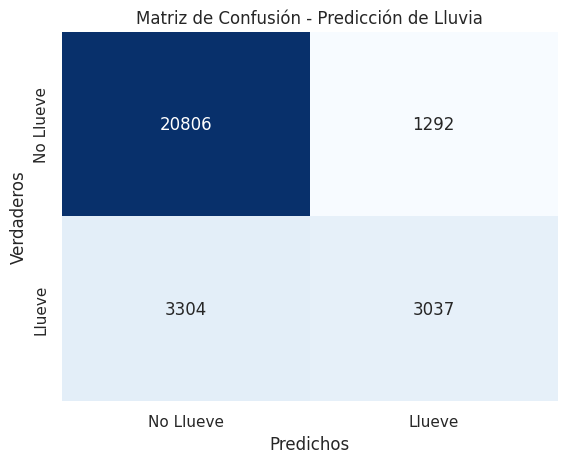

In [ ]:
# Creamos un heatmap con seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Llueve', 'Llueve'],
            yticklabels=['No Llueve', 'Llueve'])

plt.title('Matriz de Confusión - Predicción de Lluvia')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

Importancia de variables

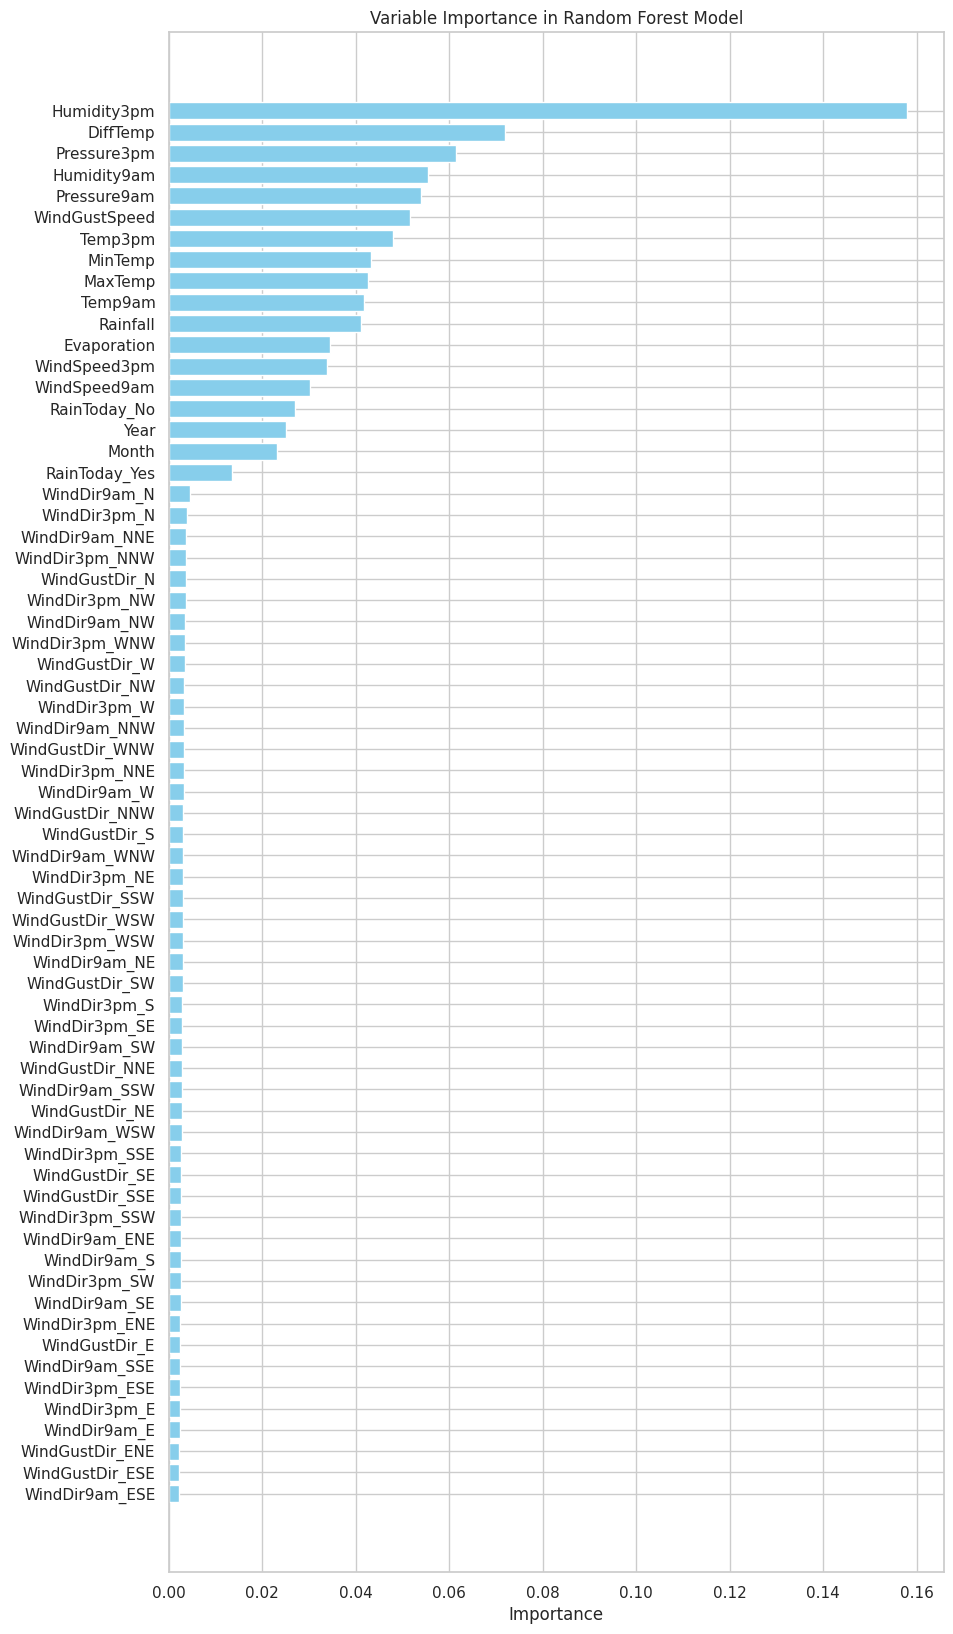

In [ ]:
# Entrenamos el modelo con los datos completos
rf_model.fit(X, y)

# Obtenemos la importancia de las variables desde el modelo
importance = rf_model.feature_importances_

# Creamos un DataFrame para visualizar la importancia
varImportance = pd.DataFrame({'Variables': X.columns, 'Importance': importance})

# Ordenamos las variables por importancia
varImportance = varImportance.sort_values(by='Importance', ascending=False)

# Creamos el gráfico de barras de importancia
plt.figure(figsize=(10, 20))
plt.barh(varImportance['Variables'], varImportance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Variable Importance in Random Forest Model')
plt.gca().invert_yaxis()  #  para mostrar la variable más importante arriba
plt.show()

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


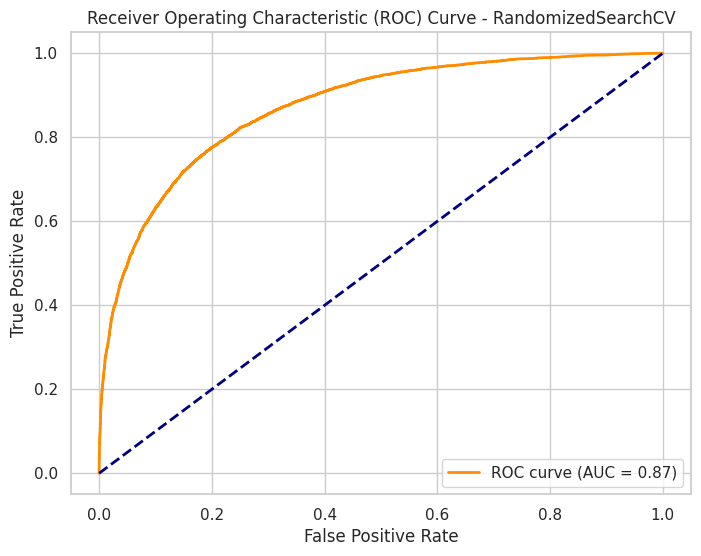


Test Set Metrics (Random Forest Optimizado - RandomizedSearchCV):
Accuracy: 0.8490101621013397
Confusion Matrix:
 [[21062  1036]
 [ 3258  3083]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22098
         1.0       0.75      0.49      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [ ]:
# Definir el espacio de búsqueda para hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear una instancia del modelo de Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Crear una instancia de RandomizedSearchCV
randomized_search = RandomizedSearchCV(rf_model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
randomized_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", randomized_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_rf_model_randomized = randomized_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf_randomized = best_rf_model_randomized.predict(X_test)

# Evaluación del modelo en el conjunto de prueba
accuracy_best_rf_randomized = accuracy_score(y_test, y_pred_best_rf_randomized)
conf_matrix_best_rf_randomized = confusion_matrix(y_test, y_pred_best_rf_randomized)
class_report_best_rf_randomized = classification_report(y_test, y_pred_best_rf_randomized)

# Calcular y graficar la curva ROC
y_prob_best_rf_randomized = best_rf_model_randomized.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
roc_auc_best_rf_randomized = roc_auc_score(y_test, y_prob_best_rf_randomized)
fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_prob_best_rf_randomized)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rfr, tpr_rfr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_best_rf_randomized))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomizedSearchCV')
plt.legend(loc='lower right')
plt.show()

# Imprimir las métricas del conjunto de prueba
print("\nTest Set Metrics (Random Forest Optimizado - RandomizedSearchCV):")
print("Accuracy:", accuracy_best_rf_randomized)
print("Confusion Matrix:\n", conf_matrix_best_rf_randomized)
print("Classification Report:\n", class_report_best_rf_randomized)


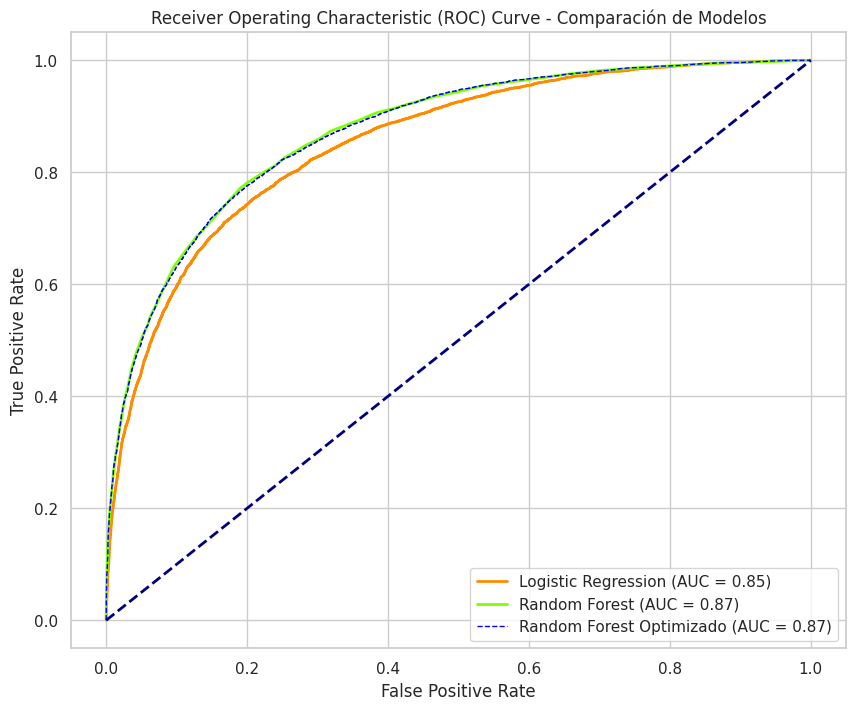


Comparación de AUC-ROC:
Logistic Regression: 0.8531541886881464
Random Forest: 0.8726277252243446
Random Forest Optimizado - RandomizedSearchCV: 0.8718301461929797

Comparación de Accuracy:
Logistic Regression: 0.8383909420162453
Random Forest: 0.8503111923766659
Random Forest Optimizado - RandomizedSearchCV: 0.8490101621013397

Comparación de Confusion Matrix:
Logistic Regression:
 [[20806  1292]
 [ 3304  3037]]
Random Forest:
 [[21083  1015]
 [ 3242  3099]]
Random Forest Optimizado - RandomizedSearchCV:
 [[21062  1036]
 [ 3258  3083]]

Comparación de Classification Report:
Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.70      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439

Random Forest:
               precision    recall  f1-score   suppor

In [ ]:
# Graficar las curvas ROC de los tres modelos
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot(fpr_rf, tpr_rf, color='chartreuse', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_rfr, tpr_rfr, color='blue', lw=1, linestyle='--', label='Random Forest Optimizado (AUC = {:.2f})'.format(roc_auc_best_rf_randomized))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()

# Comparación de AUC-ROC
print("\nComparación de AUC-ROC:")
print("Logistic Regression:", roc_auc_logistic)
print("Random Forest:", roc_auc_rf)
print("Random Forest Optimizado - RandomizedSearchCV:", roc_auc_best_rf_randomized)

# Comparación de accuracy
print("\nComparación de Accuracy:")
print("Logistic Regression:", accuracy)
print("Random Forest:", accuracy_rf)
print("Random Forest Optimizado - RandomizedSearchCV:", accuracy_best_rf_randomized)

# Comparación de confusion matrix
print("\nComparación de Confusion Matrix:")
print("Logistic Regression:\n", conf_matrix)
print("Random Forest:\n", conf_matrix_rf)
print("Random Forest Optimizado - RandomizedSearchCV:\n", conf_matrix_best_rf_randomized)

# Comparación de classification report
print("\nComparación de Classification Report:")
print("Logistic Regression:\n", class_report)
print("Random Forest:\n", class_report_rf)
print("Random Forest Optimizado - RandomizedSearchCV:\n", class_report_best_rf_randomized)

##Conclusión

El modelo Random Forest Optimizado obtenido a través de RandomizedSearchCV tiene igual valor de accuracy (0.85) que el modelo Random Forest. Logistic Regression tiene un valor ligeramente más bajo en términos de accuracy (0.84).

La comparación de las matrices de confusión y los informes de clasificación indica que los modelos Random Forest y Random Forest Optimizado tienen un rendimiento similar, con métricas de precisión y recall más altas en comparación con Logistic Regression.